In [1]:
import numpy as np
import pandas as pd

In [2]:
cust=pd.read_csv(r'C:\Users\Sai\Desktop\notes\sowmiya\Python\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv')

In [3]:
claims = pd.read_csv(r'C:\Users\Sai\Desktop\notes\sowmiya\Python\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv')

In [4]:
data=pd.merge(left=cust,right=claims,left_on="CUST_ID",right_on="customer_id",how="left")

In [5]:
data.sample()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
885,73869005,Female,01-Jul-64,WV,695-428-9762,Gold,39893971.0,73869005.0,Other driver error,08/18/2017,Auto,No,Material only,$2100,3.0,No


In [6]:
data.drop(columns="CUST_ID",inplace=True)

Perform a data audit for the datatypes and find out if there are any 
mismatch within the current datatypes of the columns and their 
business significance.

In [7]:
data.dtypes

gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
customer_id            float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [8]:
data['claim_date']=pd.to_datetime(data.claim_date,format='%m/%d/%Y')

Convert the column claim_amount to numeric. Use the appropriate 
modules/attributes to remove the $ sign

In [9]:
data['claim_amount']=data['claim_amount'].str[1:]

In [10]:
data['claim_amount']=data['claim_amount'].astype(np.float64)


Of all the injury claims, some of them have gone unreported with the 
police. Create an alert flag (1,0) for all such claims.

In [11]:
data['alert_flag']=np.where(((data['police_report']=='No') | (data['police_report']=='Unknown')) & (data['claim_type']=='Injury only'),1,0)

One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID 
should remain unique. 
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column

In [12]:
data.drop_duplicates(subset='customer_id',keep='last',inplace=True)

Check for missing values and impute the missing values with an 
appropriate value. (mean for continuous and mode for categorica

In [13]:
categorical=data.select_dtypes('object').columns
categorical

Index(['gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'incident_cause', 'claim_area', 'police_report', 'claim_type',
       'fraudulent'],
      dtype='object')

In [14]:
[data[i].fillna(data[i].mode()[0],inplace=True) for i in categorical]

[None, None, None, None, None, None, None, None, None, None]

In [15]:
numerical =data.select_dtypes('number').columns
[data[i].fillna(data[i].mean(),inplace=True) for i in numerical]


[None, None, None, None, None]

In [16]:
data.drop_duplicates(subset='customer_id',keep='last',inplace=True)

Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [17]:
import datetime as dt
data['DateOfBirth']=pd.to_datetime(data['DateOfBirth'],format='%d-%b-%y')

In [18]:
data['age']=dt.datetime.now().year-data['DateOfBirth'].dt.year

In [19]:
data['age']=abs(data.age)

In [20]:
data['AgeGroup']=np.where(((data['age']<18) & (data['age']>0)),'Youth',np.where(((data['age']>=18) & (data['age']<=30)),'Adult','Senior') )

What is the average amount claimed by the customers from various 
segments?

In [21]:
data.pivot_table(index='Segment',values='claim_amount')

,claim_amount
Segment,
Gold,12846.386178
Platinum,12372.003686
Silver,12267.146560


How many adults from TX, DE and AK claimed insurance for driver 
related issues and causes

In [22]:
adult_claim_driver=data.loc[((data.State=='AR') | (data.State=='TX')| (data.State=='DE') )&(data.AgeGroup=='Adult')&(data.incident_cause.str.lower().str.contains('driver'))]
len(adult_claim_driver)

7

Draw a pie chart between the aggregated value of claim amount based 
on gender and segment. Represent the claim amount as a percentage on
the pie chart.

In [23]:
gender_segment=data.pivot_table(index='Segment',values='claim_amount',columns='gender')

In [24]:
import seaborn as sns

array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

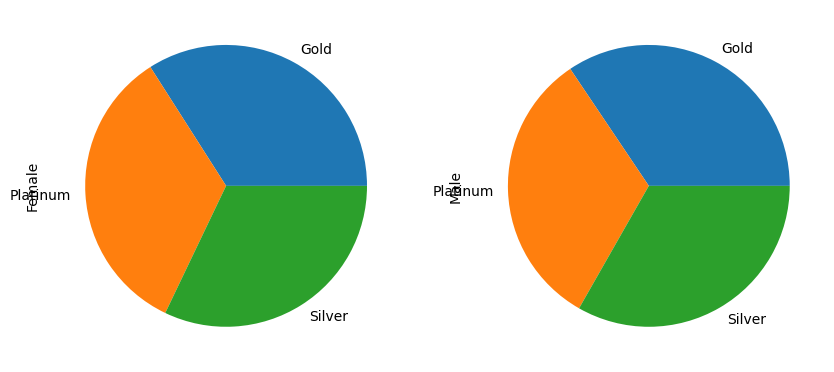

In [25]:
gender_segment.plot(kind='pie',subplots=True,legend=False,figsize=(10,10))

Among males and females, which gender had claimed the most for any 
type of driver related issues? E.g. This metric can be compared using a 
bar chart

gender
Female    28412.515622
Male      28692.930679
dtype: float64

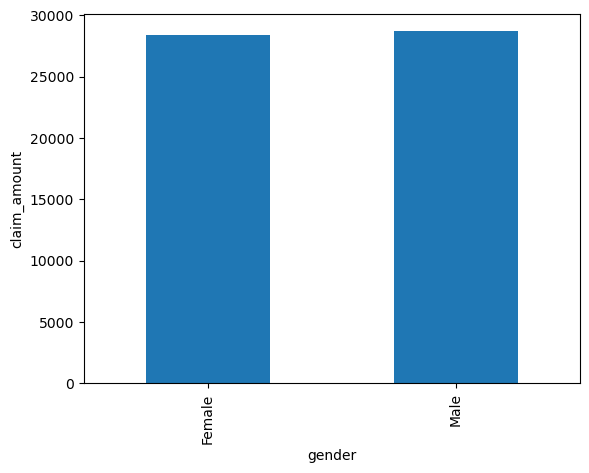

In [26]:
gender_driver_issue=data.loc[(data.incident_cause.str.lower().str.contains('driver'))]

gender_bar=gender_driver_issue.pivot_table(index='incident_cause',values='claim_amount',columns='gender').sum()
gender_bar.plot(kind='bar',ylabel='claim_amount')
gender_bar

 Which age group had the maximum fraudulent policy claims? Visualize 
it on a bar chart.

In [27]:
data.loc[data.fraudulent == 'Yes']


,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,age,AgeGroup
13,Female,2066-09-09,RI,165-519-4583,Gold,63246959.0,33507197.0,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,0,43,Senior
14,Female,1985-12-30,KY,764-439-9856,Gold,74165873.0,99103685.0,Other driver error,2018-01-13,Home,No,Material only,1495.000000,1.0,Yes,0,38,Senior
20,Male,1987-03-15,RI,165-217-1648,Silver,12548447.0,1407979.0,Driver error,2018-06-03,Auto,Unknown,Material only,3208.500000,1.0,Yes,0,36,Senior
37,Female,1988-09-03,NY,493-937-8297,Platinum,16773361.0,70459181.0,Other driver error,2017-10-10,Auto,No,Material only,2725.500000,1.0,Yes,0,35,Senior
51,Female,1993-06-09,MA,328-683-8359,Gold,28636278.0,31012778.0,Other causes,2018-03-01,Auto,No,Material only,12501.489635,5.0,Yes,0,30,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Female,1980-05-18,TN,891-651-8671,Gold,85546357.0,90217818.0,Other driver error,2017-06-04,Auto,No,Injury only,37743.000000,1.0,Yes,1,43,Senior
1070,Female,1975-01-18,TX,189-276-3957,Platinum,67763980.0,70708127.0,Natural causes,2018-09-19,Auto,No,Material only,1150.000000,1.0,Yes,0,48,Senior
1073,Female,1984-10-09,OH,592-192-8417,Gold,15231655.0,81526763.0,Other causes,2017-02-03,Auto,Unknown,Material only,2323.000000,3.0,Yes,0,39,Senior
1075,Male,1975-09-02,WI,214-457-4352,Gold,57326503.0,29854604.0,Other driver error,2018-07-20,Auto,No,Material and injury,44033.500000,1.0,Yes,0,48,Senior
